# Introducción a Machine Learning - Aprendizaje supervisado

## Tabla de Contenidos

1. <a href="#section_intro">Introducción</a>
2. <a href='#section_sklearn'>Machine Learning con Scikit-Learn</a>
3. <a href="#section_supervisado">Aprendizaje supervisado</a>
- 3.1 <a href="#section_regresion">Regresión</a>
- 3.2 <a href="#section_clasificacion">Clasificación</a>
4. <a href="#section_resumen">En resumen</a>
---

<a id="section_intro"></a>
##  Introducción

Cuando hablamos de *machine learning*, nos referimos al proceso mediante el cual **una computadora aprende a resolver una determinada tarea a partir de datos _sin que esté explícitamente programada para ello_**. Si bien muchas de las técnicas de aprendizaje automático existen hace ya varias décadas, en los últimos años se ha producido una verdadera explosión de estas tecnologías que ha hecho que múltiples aspectos de nuestra vida cotidiana estén totalmente permeados por el *machine learning*. Desde los sistemas de recomendación que nos sugieren qué película ver o qué artículo leer hasta las cámaras inteligentes que saben reconocer rostros en fotos de teléfonos celulares, pasando por detectores de spam en los servicios de e-mail y la publicidad dirigida en redes sociales, todas estas aplicaciones se desarrollan a partir de diversos algoritmos de *machine learning*.

Hasta el momento, siempre que hemos analizado datos, lo hicimos desde la estadística descriptiva, aquella que permite caracterizar los datos, y la estadística inferencial, que permite establecer conclusiones acerca de los parámetros de una población a partir de estimadores muestrales. Las técnicas de *machine learning*, en cambio, típicamente se enmarcan dentro del ámbito de la **estadística predictiva**. El aprendizaje automático entra en juego cuando **los algoritmos procesan datos de entrada y se adaptan a ellos para construir un modelo que represente su comportamiento general. Una vez que estos modelos han sido ajustados a datos observados previamente, pueden ser usados para predecir y entender aspectos de datos nuevos**.

Mientras que estos métodos pueden ser increíblemente poderosos, para ser efectivos deben utilizarse con un sólido conocimiento de las fortalezas y debilidades de cada uno, para lo cual es imprescindible tener un entendimiento general de algunos **conceptos claves**, como los de **sesgo y varianza, subajuste y sobreajuste, parámetros e hiperparámetros y validación cruzada**, entre otros. Esta notebook será nuestro primer contacto con el *machine learning*: aparecerán muchos conceptos nuevos sobre los que iremos profundizando más adelante, pero con los que es conveniente ir ganando cierta familiaridad, ya que nos acompañarán en todas las clases de ahora en más.

Comenzaremos distinguiendo los distintos tipos de aprendizaje posibles y luego introduciremos la biblioteca **Scikit-Learn**, el paquete por excelencia - aunque no el único - para trabajar con algoritmos de *machine learning* con Python. Mostraremos algunas aplicaciones sencillas de los distintos tipos de problemas que podemos resolver con estas herramientas y presentaremos la metodología y el flujo de trabajo típicos en un proyecto de *machine learning*.

###  Tipos de aprendizaje

A grandes rasgos, podemos distinguir **dos tipos de aprendizaje automático: el aprendizaje supervisado y el aprendizaje no supervisado**. La diferencia entre ambos radica en la **existencia o no de una variable objetivo** que queramos predecir, respectivamente.

####  Aprendizaje supervisado

Los algoritmos de aprendizaje supervisado se encargan de **asociar características o *features* de las observaciones a una determinada variable *target***. Si la variable objetivo es una **variable continua**, como podrían ser el precio del metro cuadrado de una propiedad o el producto bruto interno de un país, se trata de un problema de **regresión**. Si, por el contrario, la variable objetivo es una **variable categórica**, como podría ser el caso de los tags de spam o no spam de un correo electrónico, nos encontramos ante un caso de **clasificación**.

La supervisión del aprendizaje se produce en el momento en que comparamos las predicciones del modelo con los valores reales que se buscan predecir. Dependiendo del tipo de problema, existen distintas **métricas de *performance*** que podemos computar para saber cuán acertadas fueron las predicciones.

####  Aprendizaje no supervisado

A diferencia de lo que ocurre en el caso de los algoritmos de regresión o clasificación, el aprendizaje no supervisado **se caracteriza por prescindir de una variable *target*. El foco está puesto en descubrir patrones o estructuras subyacentes en la información que nos permitan generar *insights* relevantes en una estructura de datos que, a priori, no son evidentes.** Dentro del aprendizaje no supervisado, se engloban las técnicas de ***clustering*** y las de **reducción de la dimensionalidad**.

**En esta notebook, nos concentraremos en los problemas supervisados**.

<a id="section_sklearn"></a>
##  Machine Learning con Scikit-Learn

### Documentación
https://scikit-learn.org/


Hay varias bibliotecas de Python que proveen sólidas implementaciones de muchos de algoritmos de _machine learning_. Una de las más difundidas es **Scikit-Learn**, un paquete que provee implementaciones eficientes de un gran número de los algoritmos más usados a través de una interfaz estándar y consistente.

A continuación, veremos varios ejemplos simples de aplicación de métodos de aprendizaje supervisado. Este primer contacto nos permitirá ilustrar la metodología de trabajo y asentar las bases del uso de Scikit-Learn.

<a id="section_supervisado"></a>
## Aprendizaje supervisado

<a id="section_regresion"></a>
### Regresión

Como ejemplo de este proceso, vamos a considerar una regresión lineal simple, es decir, el caso común de ajustar una recta a datos de la forma $(x, y)$, donde $x$ es la única _feature_ que caracteriza a una observación e $y$, el valor de la variable objetivo asocidada.

El modelo asume que hay una relación aproximadamente lineal entre $x$ e $y$, que podemos expresar matemáticamente como

$$ y_i \approx \beta_0 + \beta_1 x_{i1}. $$

De acuerdo a esta ecuación, decimos que regresamos $y$ a partir de $x$. $\beta_0$ y $\beta_1$ son los coeficientes o parámetros desconocidos que representan la ordenada al origen y la pendiente del modelo lineal, respectivamente.  

La tarea consiste en estimar los valores de $\beta_0$ y $\beta_1$ que permitan hacer una predicción de $y$ a partir de un valor conocido de $x$. Una vez que ajustamos el modelo a nuestros datos, obtenemos los estimadores $\hat{\beta_0}$ y $\hat{\beta_1}$, con los que podemos predecir $y$ a partir de cualquier valor de $x$, simplemente computando

$$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_{i1}. $$

Para ejemplificar la regresión lineal simple, vamos a utilizar el dataset de publicidad presentado en el manual [An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) de James, Witten, Hastie y Tibshirani (2013).

Primero importamos las librerías necesarias para trabajar con datos y visualizar:

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos el dataset de publicidad para nuestro ejemplo de regresión:

In [4]:
advertising = pd.read_csv('Advertising.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Vamos a observar las primeras 5 filas de nuestro dataset. 

In [5]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Las primeras tres columnas representan los gastos de publicidad en miles de USD en diferentes medios (TV, radio y diarios). Estas tres columnas constituyen nuestras _features_.

La cuarta columna representa las ventas de un determinado producto en miles de unidades de la empresa que invierte en publicidad. Esta va a ser nuestra variable _target_.

**Nuestro objetivo será predecir la cantidad de ventas a partir de la inversión en publicidad en los diferentes medios**.

Visualizamos los datos haciendo un *pair plot*:

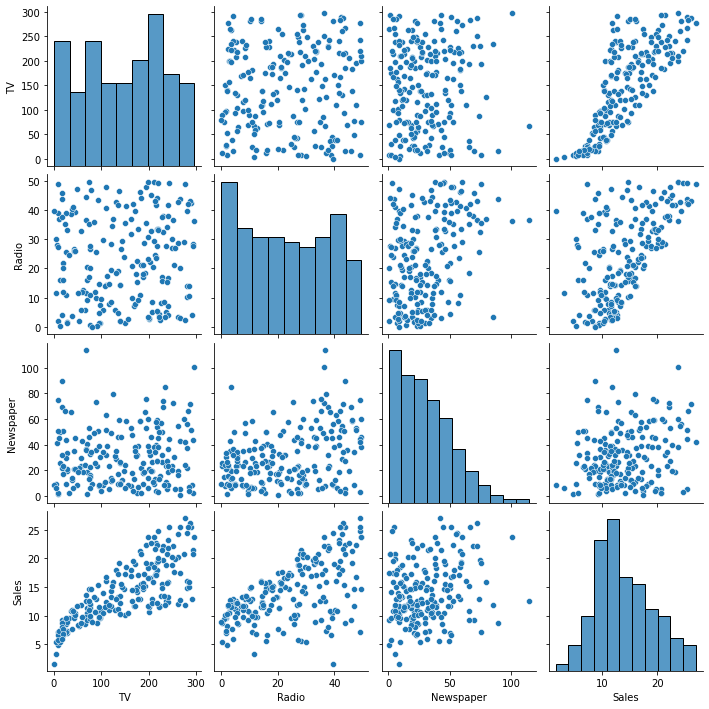

In [6]:
sns.pairplot(advertising);

Visualizamos la matriz de correlación:

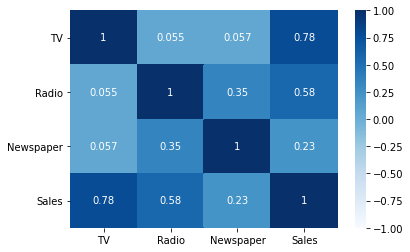

In [7]:
sns.heatmap(advertising.corr(), annot=True, vmin=-1, cmap='Blues');

Como nuestro primer objetivo es hacer un modelo de regresión simple, es decir con una sola feature, vamos a elegir la variable TV, ya que es la que muestra una correlación mayor con nuestra variable objetivo.

Vamos a hacer un _scatter plot_ entre TV y Sales. El método `regplot()` de Seaborn genera un gráfico que, además de los datos, también nos va a mostrar la recta que se obtiene con una regresión lineal simple:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


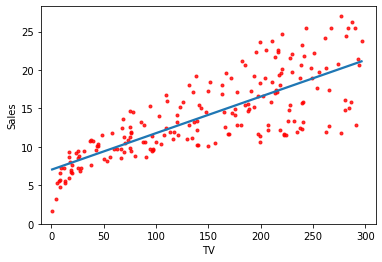

In [8]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Cómo se interpreta esta recta?</b></label></div>
</div>

Para poder conocer qué valores adoptan $\hat{\beta_0}$ y $\hat{\beta_1}$, necesitamos ajustar un modelo de regresión lineal simple a los datos. Para ello, utilizaremos Scikit-Learn y seguiremos una serie de pasos que marcan el flujo de trabajo típico:

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png"/> </div>
  <div style="float:left;width: 85%;"><label><b>1. Seleccionar una clase de modelo<br>
                                             2. Elegir los hiperparámetros del modelo<br>
                                             3. Preparar los datos en una matriz de <i>features</i> y un vector <i>target</i><br>
                                             4. Separar los sets de entrenamiento y de testeo<br>
                                             5. Ajustar el modelo a los datos de entrenamiento<br>
                                             6. Predecir etiquetas para datos desconocidos<br>
      7. Evaluar la <i>performance</i> del modelo</b></label></div>
</div>

##### **1. Seleccionar una clase de modelo**

En Scikit-Learn, cada clase de modelo se representa con una clase de Python. La biblioteca está cuidadosamente estructurada en módulos, de forma tal que cada clase o función se encuentre en un módulo específico que engloba clases o funciones de la misma familia. Entonces, por ejemplo, si queremos trabajar con un modelo de regresión lineal, podemos importar la clase de regresión lineal de esta forma del módulo correspondiente:

In [9]:
from sklearn.linear_model import LinearRegression

`LinearRegression` constituye una clase de **estimador** particular. Notar que también existen otros modelos de regresión lineal más generales. Podés leer más acerca de ellos en la [documentación del módulo `linear_model`](http://Scikit-Learn.org/stable/modules/linear_model.html). 

##### **2. Elegir los hiperparámetros del modelo**

Es importante destacar que **una clase de modelo no es lo mismo que una instancia de modelo**.

Una vez que hemos decidido nuestra clase de modelo, todavía tenemos que tomar algunas decisiones. Dependiendo de la clase de modelo con la que trabajemos, podríamos tener que responder a una o más preguntas como las siguientes:

- ¿Queremos incluir también un intercepto (`intercept = True`)?
- ¿Queremos que el modelo esté normalizado?
- ¿Queremos agregar features calculados a partir del input para darle mayor flexibilidad al modelo?
- ¿Qué grado de regularización vamos a querer usar en el modelo?

Estos son ejemplos de las importantes decisiones que deben hacerse una vez que hemos seleccionado la clase de modelo a usar.

Estas elecciones se representan frecuentemente como **hiperparámetros**, o parámetros que deben ser seteados antes de que el modelo sea ajustado a los datos. Una misma clase de modelo con dos configuraciones de hiperparámetros distintas puede llevar a resultados muy disímiles entre sí.

En Scikit-Learn, los hiperparámetros son elegidos como argumentos en la instanciación del modelo. Exploraremos cómo podemos justificar cuantitativamente la elección de hiperparámetros en las próximas clases.

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase `LinearRegression` y especificar que nos gustaría ajustar el intercepto seteando a `True` el hiperparámetro `fit_intercept`: 

In [10]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Tener en cuenta**: cuando el modelo es instanciado, la única acción que sucede es almacenar los valores de los hiperparámetros.

En concreto, todavía no hemos ajustado el modelo a ningún dato: la API de Scikit-Learn hace una **distinción muy clara entre la _elección del modelo con sus hiperparámetros_ y el _ajuste del modelo a los datos_**. 

##### **3. Preparar los datos en una matriz de _features_ y un vector _target_**

Nosotros queremos predecir el valor de Sales a partir del valor de gastos publicitarios en TV. Para que nos sirvan como *input* de un determinado algoritmo, habrá que representarlos correctamente. Scikit-Learn requiere que los datos de entrada sean representados como **una matriz de _features_ de dos dimensiones y un vector _target_ de una dimensión**. La matriz de _features_ puede ser un array 2D de Numpy o un `DataFrame` de Pandas, mientras que el vector objetivo puede ser un array 1D de Numpy o una `Series` de Pandas.

A continuación, creamos la matriz de _features_ (a la que llamaremos $X$ por convención) y el vector _target_ ($y$), que utilizaremos para ajustar nuestro modelo de regresión lineal simple.

In [11]:
# Creamos X e y
feature_cols = ['TV']
X = advertising[feature_cols]
y = advertising.Sales

# Corrobaros la shape y el tipo de cada una
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (200, 1)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (200,)
Type y: <class 'pandas.core.series.Series'>


<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:center"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Por más de que $X$ contenga una única variable, aun así debemos tratarla como un objeto bidimensional por los requerimientos de representación de datos propios de Scikit-Learn.</b></label></div>
</div>

##### **4. Separar los sets de entrenamiento y de testeo**

Sabemos que para que nuestro modelo pueda predecir, debe aprender primero a partir de los datos. Será importante poder evaluar qué tan buenas resultan sus predicciones, comparándolas con los valores reales que se buscan predecir. Si bien esta evaluación puede hacerse sobre los mismos datos con los que ajustamos nuestro modelo, también sería deseable tener una noción acerca de cómo se comporta frente a datos nunca antes vistos. Después de todo, el interés real de cualquier modelo de _machine learning_ radica en poder hacer predicciones de variables relevantes que nos son desconocidas ($y$) a partir de un conjunto de información con la que sí contamos ($X$).

La pregunta es, entonces, ¿cómo generamos estos datos nunca antes vistos por el modelo? Una opción sería recolectar nuevas muestras y utilizar nuestro modelo para hacer predicciones de nuestra variable de interés, $y$, a partir de los atributos de cada muestra, $X$. Pero si desconocemos el verdadero valor de $y$, ¿cómo podemos evaluar las predicciones?

Para resolver este problema, vamos a dividir los datos en un _training set_ y un _testing set_. El modelo aprenderá a partir de los datos del _training set_ y, luego del entrenamiento, predecirá valores de $y$ a partir de observaciones de la $X$ del conjunto de _testing set_, que luego serán contrastadas con los valores reales de las $y$ de testeo.

Esto podría hacerse a mano, pero es más conveniente usar la función `train_test_split()`, que importaremos del módulo de [`model_selection`](https://scikit-learn.org/stable/model_selection.html) de Scikit-Learn, el cual contiene herramientas para la selección y evaluación de modelos:

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

`train_test_split()` debe recibir como argumento un objeto bidimensional $X$, un objeto unidimensional $y$, a partir de los cuales devuelve dos matrices matrices de _features_ y dos vectores *target*, correspondientes a los conjuntos de entrenamiento y testeo, respectivamente. Notar que el orden es relevante, por lo que tendremos que prestar atención a la asignación de los retornos de la función. Con una sintaxis similar a la de _unpacking_ de listas o tuplas, podemos hacer una correcta asignación en una única línea de código:

```python
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
```

Por defecto, la separación de las observaciones se hace al azar (`shuffle=True`), de forma tal de trabajar con un muestreo aleatorio. Para poder controlar esta aleatoriedad, podemos establecer con el argumento `random_state` una semilla (equivalente al `seed` de Numpy). Optativamente, también podemos regular el tamaño de cada set de datos con los argumentos `train_size` o `test_size`.

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué inconvenientes podrían surgir de no aleatorizar los datos que son asignados a los conjuntos de entrenamiento y testeo?</b></label></div>
</div>

##### **5. Ajustar el modelo a los datos de entrenamiento**

Ahora es momento de que nuestro modelo aprenda a partir de los datos de entrenamiento. Esto puede hacerse con el método ``fit()`` de nuestra instancia de modelo.

In [13]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

> El verbo _fit_ puede traducirse como _ajustar_ o *entrenar*, por lo que nos referiremos indistintamente al proceso de aprendizaje propio del _machine learning_ con cualquiera de estos dos términos.

El método ``fit()`` realiza una secuencia de cómputos internos dependientes del modelo, y los resultados de estas operaciones son almacenadas en atributos específicos de la clase de modelo que el usuario luego puede explorar.

En Scikit-learn, por convención, todos los atributos que representan los parámetros de los modelos que fueron aprendidos durante el proceso de entrenamiento con ``fit()`` se identifican por tener guiones bajo (*underscores*) luego de sus nombres. Por ejemplo, en este modelo lineal, podemos verificar los valores de $\hat{\beta_0}$ y $\hat{\beta_1}$ aprendidos inspeccionando los atributos `intercept_` y `coef_`, respectivamente:

In [14]:
model.coef_

array([0.04802945])

In [15]:
model.intercept_

6.9119726188687185

Estos dos parámetros representan la pendiente y el intercepto del ajuste lineal simple a los datos.

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Cómo interpretamos a estos valores? ¿Qué relación tienen con el gráfico que veíamos anteriormente?</b></label></div>
</div>

Una pregunta que surge frecuentemente se relaciona con incertidumbre o incerteza (*uncertainty*) en estos parámetros internos del modelo. 

En general, Scikit-Learn no provee herramientas para obtener conclusiones del estado interno de los modelos: interpretar los parámetros de un modelo tiene mucho más que ver con una pregunta de _modelado estadístico_ que con una pregunta de _machine learning_.

_Machine learning_ se enfoca en la calidad con la cual el modelo _predice_.

Si te interesa investigar el significado de los parámetros de ajuste dentro del modelo, existen otras herramientas, incluyendo el paquete de Python [Statsmodels](http://statsmodels.sourceforge.net/), con las que estaremos trabajando más adelante.

##### **6. Predecir etiquetas para datos desconocidos**

Una vez que el modelo ya está entrenado, la principal tarea en el aprendizaje supervisado es evaluarlo en base a lo que dice acerca de nuevos datos que no fueron parte del _training set_. 

En Scikit-Learn, esto puede hacerse usando el método ``predict()``.

Para ganar intuición, empecemos aplicando la fórmula $ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_{i1} $ manualmente:

In [16]:
# Aplicando la fórmula manualmente
test = 200
model.intercept_ + model.coef_*test

array([16.51786263])

**A partir de un valor conocido en gasto en publicidad en TV de 200 miles de dólares, nuestro modelo estima que un total de ventas aproximado de 16,52 mil unidades**.

In [17]:
# Usando el método del objeto
test_sklearn = np.array(test).reshape(-1,1)
model.predict(test_sklearn)

array([16.51786263])

In [18]:
test_sklearn

array([[200]])

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Por qué es necesario el paso del reshape()?</b></label></div>
</div>

Podemos calcular y asignar a una variable las predicción del modelo para todas las observaciones en el set de testeo usando el método ``predict()`` de la siguiente forma:

In [19]:
ypred = model.predict(Xtest)
ypred

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué significan estos valores?</b></label></div>
</div>

##### **7. Evaluar la _performance_ del modelo**

Finalmente, vamos a  evaluar el desempeño del modelo comparando las predicciones con los valores reales. A continuación, presentamos algunas de las métricas más utilizadas para la evaluación de un modelo de regresión:

El **error absoluto medio** (_Mean Absolut Error_ o MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

El **error cuadrático medio** (_Mean Squared Error_ o MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

El **error cuadrático medio raíz** (_Root Mean Squared Error_ o RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

El **$R^2$** es la proporción de la varianza total de $y$ explicada por el modelo.

Comparando estas métricas:

- _MAE_ es el error promedio.
- _MSE_ "penaliza" errores grandes, de ahí que eleve los valores al cuadrado.
- _RMSE_ es comparable con la variable objetivo, ya que tiene las mismas unidades que la $y$.
- _$R^2$_ es la proporción de la varianza total de $y$ explicada por el modelo

Con excepción del $R^2$, todas éstas son **funciones de pérdida**, porque queremos **minimizarlas**. El $R^2$, por su parte, cuanto más próximo a 1 se encuentre, mejor.

En el [módulo de métricas](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de Scikit-Learn podemos hallar funciones específicas para evaluar la _performance_ de un modelo:

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 2.46
MSE: 10.31
RMSE: 3.21
R2: 0.56


<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>Los métodos de evaluación requieren como argumento los valores reales y los predichos (en ese orden).</b></label></div>
</div>

<a id="section_clasificacion"></a>
### Clasificación

Dentro de lo que llamamos aprendizaje supervisado, los problemas de clasificación se diferencian de los de regresión porque **la variable objetivo es categórica**. El interés no es ya estimar un valor continuo, sino que queremos predecir una determinada **clase** o **etiqueta (*label*)** para cada observación.

Trabajaremos con un dataset que también surge del manual _An Introduction to Statistical Learning with Applications in R_, el cual contiene información acerca de titulares de tarjetas de crédito, tales como el saldo mensual, el ingreso anual y si se trata de estudiantes o no, además de una variable que indica si entraron en _default_ o no. **El objetivo será, justamente, predecir quiénes entran en _default_ y quienes no a partir de las demás *features***.

Importamos el dataset y visualizamos las primeras 5 filas:

In [23]:
df = pd.read_excel('Default.xlsx', usecols='B:E')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Generamos variables _dummies_ para representar los atributos categóricos:

In [25]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [26]:
df.describe()

,balance,income,default_Yes,student_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300,0.294400
std,483.714985,13336.639563,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000
25%,481.731105,21340.462903,0.000000,0.000000
50%,823.636973,34552.644802,0.000000,0.000000
75%,1166.308386,43807.729272,0.000000,1.000000
max,2654.322576,73554.233495,1.000000,1.000000


Generamos un _pair plot_ de las variables distinguiendo los casos de _deafult_ y no *default*:

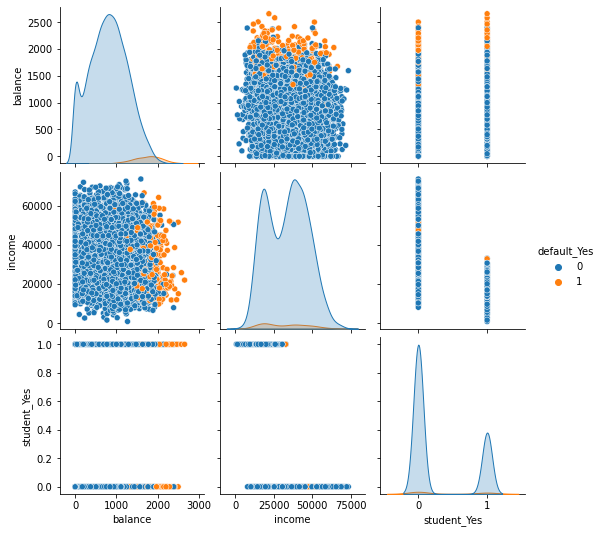

In [27]:
#sns.pairplot(df, hue='default_Yes', diag_kind='hist');
sns.pairplot(df, hue='default_Yes', diag_kind='auto');

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué observamos en estos gráficos? ¿Existen variables que podrían ser buenas predictoras?</b></label></div>
</div>

Aunque se trate ahora de un problema de clasificación, veremos a continuación que vamos a seguir nuevamente el flujo de trabajo que presentamos para el ejercicio de regresión anterior.

##### **1. Seleccionar una clase de modelo**

Para la tarea de predicción de _default_, usaremos un modelo probabilístico extremadamente simple, conocido como Naive Bayes Gaussiano, el cual parte del [Teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) y procede asumiendo que cada _feature_ se genera a partir de una [distribución Gaussiana](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) condicional a la clase (_default_ o no *default*).

In [28]:
from sklearn.naive_bayes import GaussianNB

##### **2. Elegir los hiperparámetros del modelo**

Porque es muy rápido y prácticamente no tiene hiperparámetros para elegir, Naive Bayes Gaussiano es frecuentemente utilizado como _baseline_ de cualquier problema de clasificación, para contar con una piso de _performance_ que buscaremos luego superar utilizando modelos más sofisticados.

In [29]:
model = GaussianNB()

##### **3. Preparar los datos en una matriz de _features_ y un vector _target_**

In [30]:
# Creamos X e y
feature_cols = ['balance', 'income', 'student_Yes']
X = df[feature_cols]
y = df.default_Yes

print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (10000, 3)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (10000,)
Type y: <class 'pandas.core.series.Series'>


<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>Nuestra matriz de <i>features</i> se compone ahora de tres variables predictoras. El vector <i>target</i>, por su parte, contiene ahora valores dicotómicos y no continuos que representan cada una de las clases del problema.</b></label></div>
</div>

##### **4. Separar los sets de entrenamiento y de testeo**

In [31]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

##### **5. Ajustar el modelo a los datos de entrenamiento**

In [32]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

##### **6. Predecir etiquetas para datos desconocidos**

In [33]:
ypred = model.predict(Xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué significan estos valores?</b></label></div>
</div>

##### **7. Evaluar la _performance_ del modelo**

Dado que la clasificación y la regresión se diferencian en el tipo de variable que constituye el *target*, es de esperar que no vayamos a utilizar las mismas métricas de evaluación, ya que éstas dependen, justamente, de los valores de la $y$ real y aquellos predichos.

Cuando estamos clasificando, nuestra variable objetivo es cualitativa, por lo que las etiquetas predichas sólo pueden estar acertadas o equivocadas. Una forma de evaluar a un clasificador podría ser, por ejemplo, calcular cuántas casos clasificamos correctamente en relación al total de casos. Esta métrica se conoce como **accuracy**, y puede ser computada fácilmente con el método `accuracy_score()`, que devuelve la proporción de etiquetas predichas que coinciden con el valor real.

$$ \text{Accuracy}=\frac{\text{predicciones correctas}}{\text{casos totales}} $$

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.974

Con este sencillo algoritmo de clasificación obtenemos **un accuracy del 97,4%**, es decir que 97 de cada 100 casos fueron correctamente predichos. Más adelante discutiremos si este valor es realmente alto y contra qué deberíamos compararlo para arribar a alguna conclusión al respecto, al tiempo que estudiaremos otras métricas de evaluación que también nos permitirán analizar el desempeño de un clasificador poniendo el foco en diversos aspectos del problema.

<a id="section_resumen"></a>
## En resumen

Hemos visto ejemplos de problemas de aprendizaje automático supervisado, donde buscamos predecir a partir de ciertas features una variable _target_. Cuando la variable objetivo es continua, como en el caso de la predicción de ventas a partir del presupuesto destinado a publicidad en TV, se trata de un **problema de regresión**. En cambio, cuando la variable a predecir es categórica, como en el ejemplo de predicción de _defaults_ de tarjetas de crédito, nos encontramos ante un **problema de clasificación**.

La biblioteca **Scikit-Learn** es el paquete fundamental para trabajar con algoritmos de _machine learning_ con Python. A partir de esta clase, será nuestra principal herramienta de trabajo. Es importante que recordemos el flujo de trabajo que presentamos en esta notebook, ya que nos acompañará de ahora en más:

<br>
<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png"/> </div>
  <div style="float:left;width: 85%;"><label><b>1. Seleccionar una clase de modelo<br>
                                             2. Elegir los hiperparámetros del modelo<br>
                                             3. Preparar los datos en una matriz de <i>features</i> y un vector <i>target</i><br>
                                             4. Separar los sets de entrenamiento y de testeo<br>
                                             5. Ajustar el modelo a los datos de entrenamiento<br>
                                             6. Predecir etiquetas para datos desconocidos<br>
      7. Evaluar la <i>performance</i> del modelo</b></label></div>
</div>
